In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as colors
import datetime as dt
from statistics import mode

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None,
                 names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [ ]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
print(df.shape)

(150, 5)


In [ ]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print(df["class"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [ ]:
fig = px.histogram(df, x="sepal_length", title="Histogram of Sepal Length")
fig.update_xaxes(title_text="Sepal Length")
fig.update_yaxes(title_text="Frequency")
fig.show()

In [ ]:
colors = {"Iris-setosa": "red", "Iris-versicolor": "blue", "Iris-virginica": "green"}

fig = px.scatter(df, x="sepal_length", y="sepal_width", color="class", color_discrete_map=colors,
                 title="Scatter Plot of Sepal Length vs. Sepal Width",
                 labels={"sepal_length": "Sepal Length", "sepal_width": "Sepal Width", "class": "Class"})

fig.show()

In [ ]:
print("Descriptive statistics:\n", df.describe())

Descriptive statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
fig = px.histogram(df, x="sepal_length", color="class", facet_col="class",
                   marginal="rug",
                   title="Sepal Length by Class with KDE",
                   labels={"sepal_length": "Sepal Length", "class": "Class"})

fig.update_layout(barmode='overlay')

fig.show()

In [ ]:
fig = px.histogram(df, x="sepal_width", color="class", facet_col="class",
                   marginal="rug",
                   title="Sepal Width by Class with KDE",
                   labels={"sepal_width": "Sepal Width", "class": "Class"})

fig.update_layout(barmode='overlay')
fig.show()

In [ ]:
fig = px.histogram(df, x="petal_length", color="class", facet_col="class",
                   marginal="rug",
                   title="Petal Length by Class with KDE",
                   labels={"petal_length": "Petal Length", "class": "Class"})

fig.update_layout(barmode='overlay')

fig.show()

In [ ]:
fig = px.histogram(df, x="petal_width", color="class", facet_col="class",
                   marginal="rug",
                   title="Petal Width by Class with KDE",
                   labels={"petal_width": "Petal Width", "class": "Class"})

fig.update_layout(barmode='overlay')
fig.show()

In [ ]:
fig = px.scatter_matrix(df,
                        dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"],
                        color="class",
                        title="Scatterplot Matrix by Class")

fig.show()

In [ ]:
fig = px.box(df, x="class", y="petal_length", title="Petal Length by Class")

fig.show()

In [ ]:
fig = px.box(df, x="class", y="petal_width", title="Petal Width by Class")
fig.show()

In [ ]:
fig = px.violin(df, x="class", y="petal_length", title="Comparison of Petal Length between Classes",
                box=True, points="all", hover_data=df.columns)
fig.show()

fig = px.violin(df, x="class", y="petal_width", title="Comparison of Petal Width between Classes",
                box=True, points="all", hover_data=df.columns)
fig.show()

In [ ]:
fig = px.violin(df, x="class", y="sepal_length", title="Comparison of Sepal Length between Classes",
                box=True, points="all", hover_data=df.columns)
fig.show()

fig = px.violin(df, x="class", y="sepal_width", title="Comparison of Sepal Width between Classes",
                box=True, points="all", hover_data=df.columns)
fig.show()

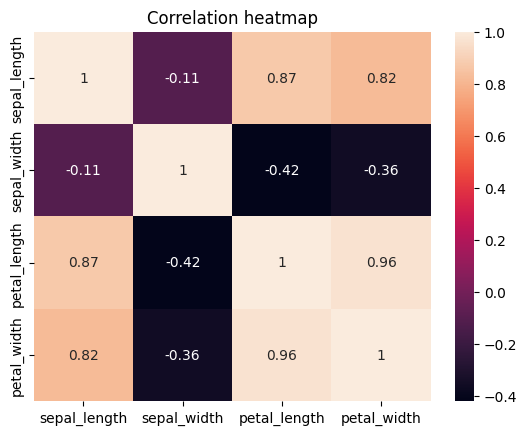

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = df.drop("class", axis=1)
y = df["class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 1.00
K-Nearest Neighbors Accuracy: 1.00
Logistic Regression Accuracy: 1.00
Naive Bayes Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


In [ ]:
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Algorithm", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

print(accuracy_df)

                Algorithm  Accuracy
0           Decision Tree       1.0
1           Random Forest       1.0
2  Support Vector Machine       1.0
3     K-Nearest Neighbors       1.0
4     Logistic Regression       1.0
5             Naive Bayes       1.0
6       Gradient Boosting       1.0


In [ ]:
fig = px.line(accuracy_df, x="Algorithm", y="Accuracy", title="Accuracy Comparison of Machine Learning Algorithms")

fig.update_layout(xaxis_title="Algorithm", yaxis_title="Accuracy",
                  xaxis_tickangle=-45, xaxis_showgrid=False)

fig.show()

## **Conclusion :**

Based on the provided accuracy results for different machine learning algorithms, it appears that all of the algorithms achieved a perfect accuracy score of 1.0 (100%). This might indicate a potential issue or limitation in the evaluation process or data splitting. Achieving a perfect accuracy score is uncommon, especially on real-world datasets.

A few potential reasons for this outcome could include:

1.   **Data Leakage:** There might have been data leakage, where information from the test set leaked into the training process, leading to overfitting. This could cause the models to perform exceptionally well on the test data.
2.   **Small Dataset:** The dataset might be very small, and each algorithm might have learned the training data patterns well enough to perform perfectly on the test set.
3.   **Homogeneous Data:** The dataset might contain data that is easily separable by the features used for classification, resulting in clear boundaries between classes.
4.   **Data Issues:** There could be issues with the dataset, such as duplicate records or incorrectly labeled data, causing the algorithms to perform unusually well.
5.   **Limited Features:** The dataset's features might have strong discriminatory power, making it easy for the algorithms to correctly classify instances.
6.   **Lack of Variability:** If the dataset lacks variability and representative samples, algorithms might not be exposed to challenging or diverse examples.

Before drawing any conclusions, it's important to validate these results by:

*   Double-checking the data preprocessing and splitting to ensure there is no data leakage.
*   Verifying the dataset's quality, correctness of labels, and uniqueness of instances.
*   Exploring different evaluation metrics beyond accuracy, such as precision, recall, F1-score, or using cross-validation for more reliable performance assessment.


In real-world scenarios, it's rare to achieve perfect accuracy, and such results should be carefully scrutinized to ensure the model's reliability and generalization capabilities.